#### Initializing sub-parameters

Before interaction analysis, we know gene_flow_rate is directly related to islands and boltzmann_temperature is only needed for boltzmann selection. So we find the optimal values for these two parameters first, and set them in the interaction analysis.

**An error occured while testing. You need to rerun this for anything final**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_param_function_module import *

cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTGTGGAGCGGGAAGACAACTAGGGG'
target_expression = 0
precision = 0.001
run_per_combination = 20

In [ ]:
# For each combination of islands and gene flow rate, run the GA and record the results

range_islands=np.linspace(1, 10, 10, dtype=int)
range_gene_flow_rate=np.linspace(0.1, 1, 10, dtype=float)

total_combinations = len(range_islands) * len(range_gene_flow_rate)
current_combination = 0
gene_flow_rate_results = []

for islands in range_islands:
    for gene_flow_rate in range_gene_flow_rate:
        current_combination += 1
        print(f'Testing Combination {current_combination}/{total_combinations}', end='\r')
        error, run_time = test_combination(
            cnn_model_path,
            masked_sequence,
            target_expression,
            precision,
            run_per_combination,
            pop_size=100, # Just an initial value
            islands=islands,
            gene_flow_rate=gene_flow_rate
        )

        # Record the results
        gene_flow_rate_results.append({
            'islands': islands,
            'gene_flow_rate': round(gene_flow_rate, 1),
            'error': error,
            'run_time': run_time
        })

gene_flow_rate_results_df = pd.DataFrame(gene_flow_rate_results)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


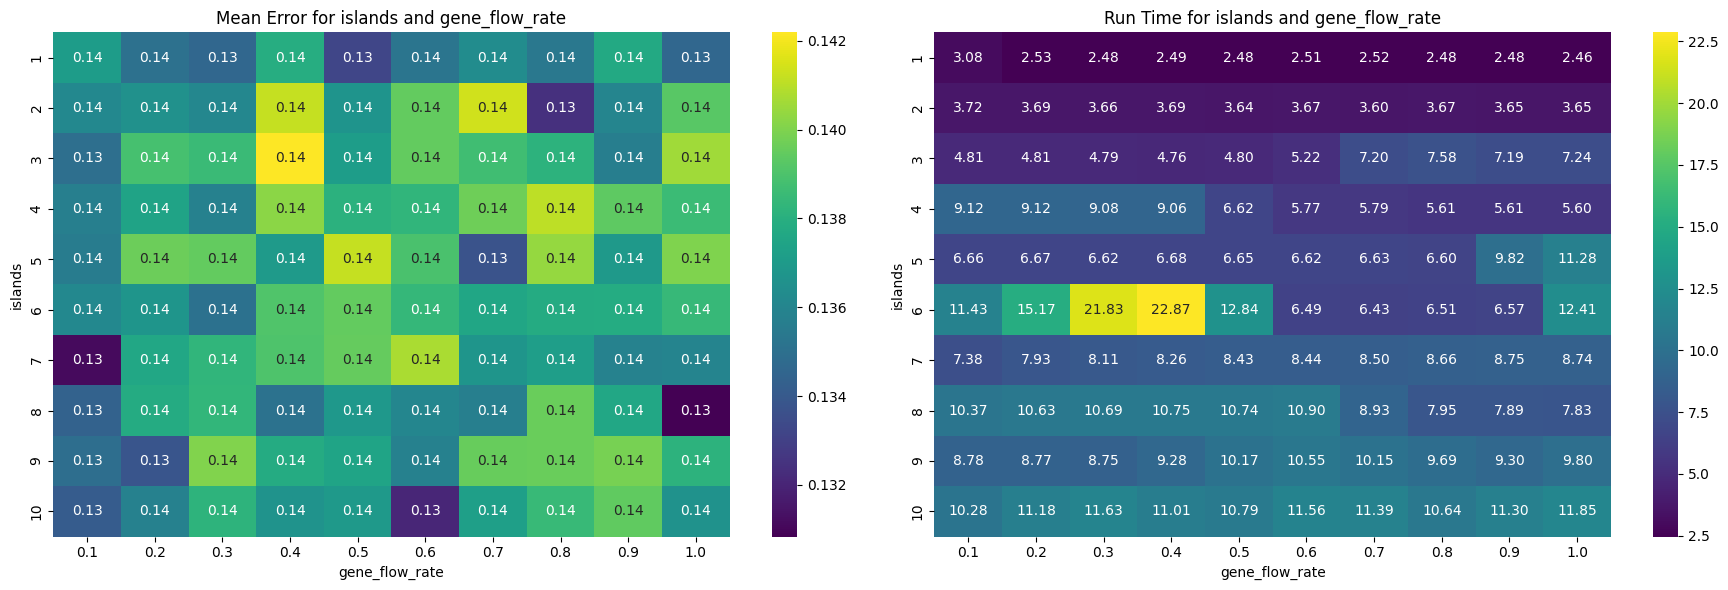

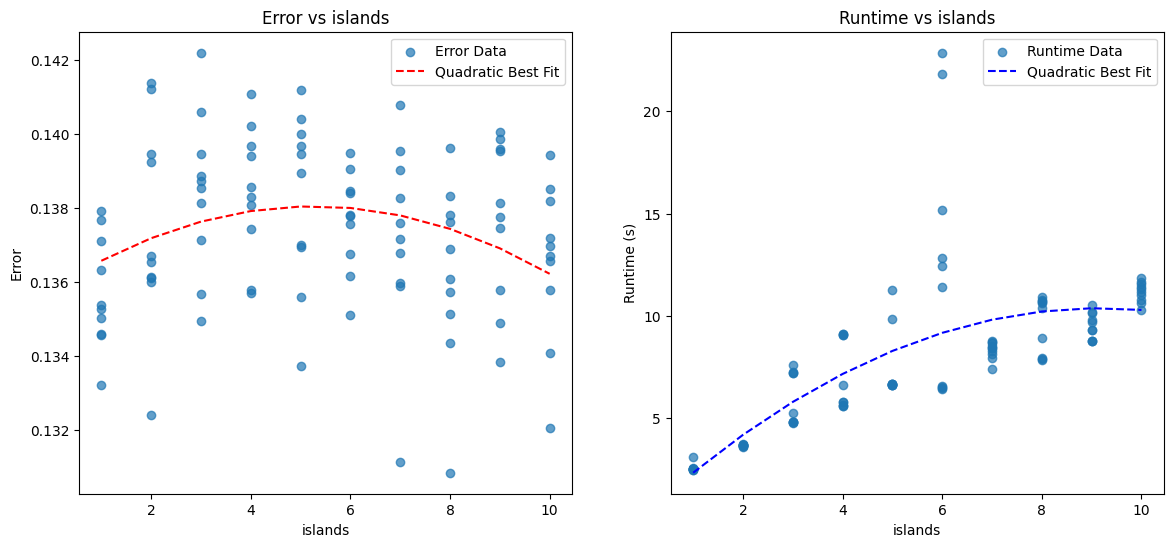

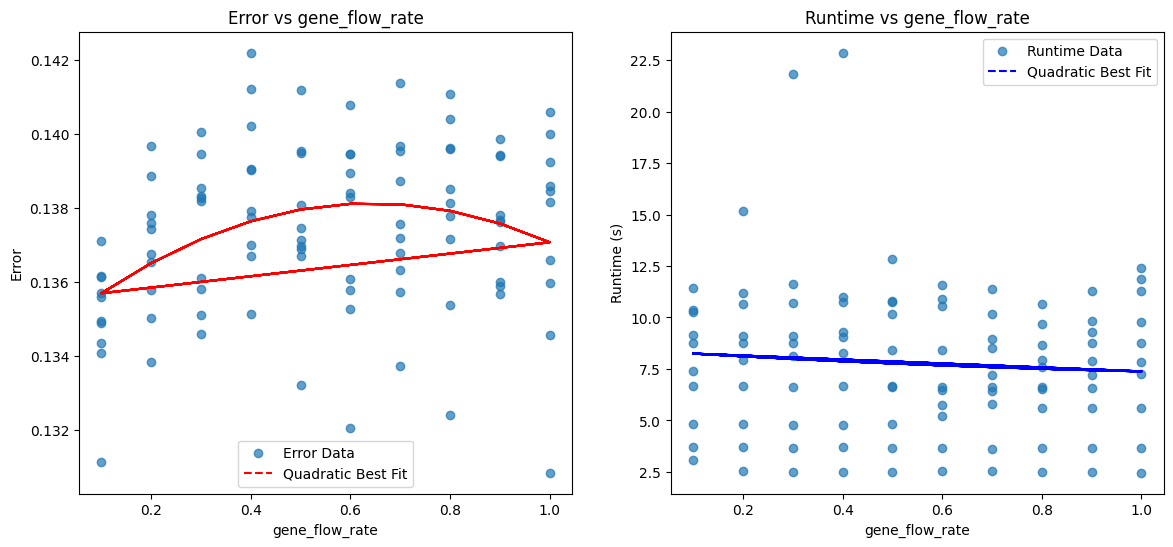

In [ ]:
heatmap(gene_flow_rate_results_df, 'islands', 'gene_flow_rate')
scatter_plot(gene_flow_rate_results_df, 'islands', 2)
scatter_plot(gene_flow_rate_results_df, 'gene_flow_rate', 2)

It appears that 1 island is optimal for both error and runtime. Similarly, no gene flow is optimal for error, though the relationship between gene_flow_rate and runtime is poor.

In [ ]:
# Find optimal boltzmann_temperature

range_boltzmann_temperature=np.linspace(1, 10, 10, dtype=float)
boltzmann_temperature_results = []

for i, boltzmann_temperature in enumerate(range_boltzmann_temperature):
    print(f'Testing Combination {i}/{len(range_boltzmann_temperature)}', end='\r')
    error, run_time = test_combination(
        pop_size=100, # Just an initial value
        selection='boltzmann',
        boltzmann_temperature=boltzmann_temperature
    )

    # Record the results
    boltzmann_temperature_results.append({
        'boltzmann_temperature': round(boltzmann_temperature, 1),
        'error': error,
        'run_time': run_time
    })
        

boltzmann_temperature_results_df = pd.DataFrame(boltzmann_temperature_results)

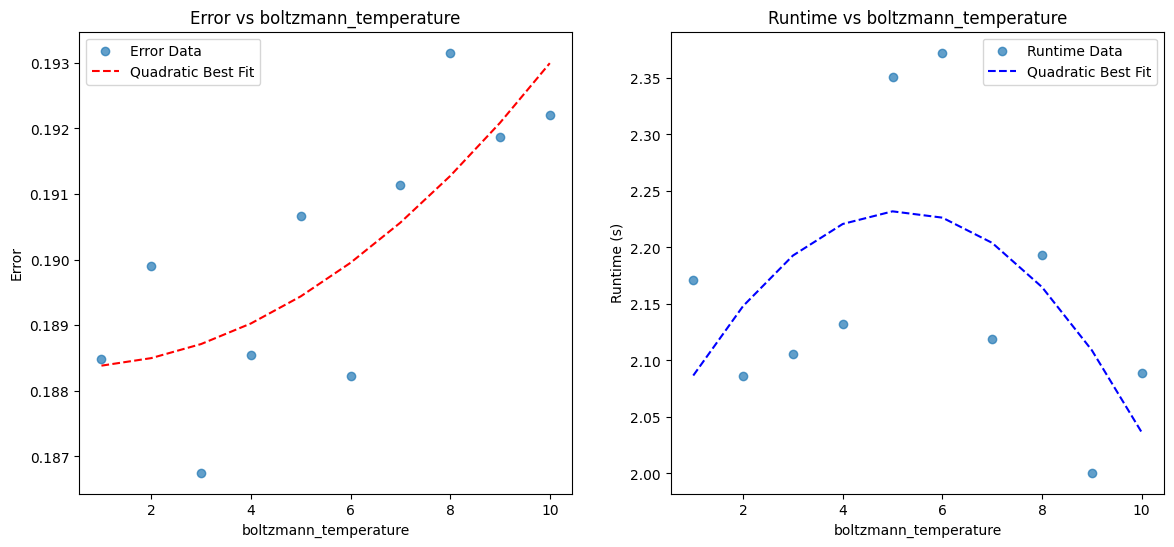

In [ ]:
scatter_plot(boltzmann_temperature_results_df, 'boltzmann_temperature', 2)

The optimal boltzmann_temperature appears to be 1 or less than 1, so we rerun the tests to see how a boltzmann_temperature < 1 perform.

In [ ]:
# Find optimal boltzmann_temperature

range_boltzmann_temperature=np.linspace(0.1, 1, 10, dtype=float)
boltzmann_temperature_results = []

for i, boltzmann_temperature in enumerate(range_boltzmann_temperature):
    print(f'Testing Combination {i}/{len(range_boltzmann_temperature)}', end='\r')
    error, run_time = test_combination(
        pop_size=100, # Just an initial value
        selection='boltzmann',
        boltzmann_temperature=boltzmann_temperature
    )

    # Record the results
    boltzmann_temperature_results.append({
        'boltzmann_temperature': round(boltzmann_temperature, 1),
        'error': error,
        'run_time': run_time
    })
        

boltzmann_temperature_results_df = pd.DataFrame(boltzmann_temperature_results)

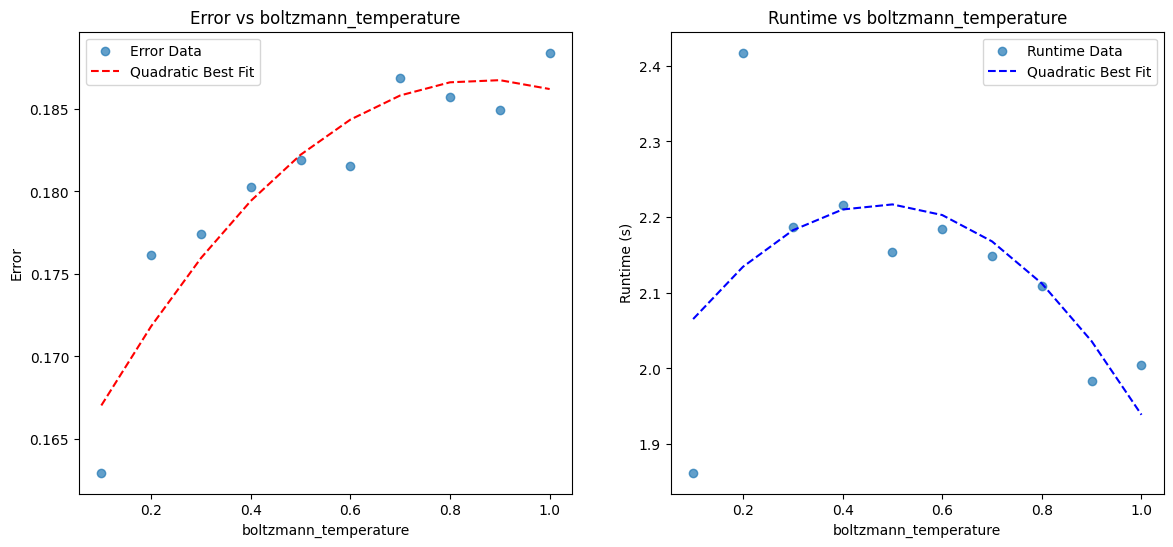

In [ ]:
scatter_plot(boltzmann_temperature_results_df, 'boltzmann_temperature', 2)

We can see that the optimal boltzmann_temperature is 0. When boltzmann_temperature is 0, the boltzmann selection method is equivalent to truncation selection: always selecting the fittest individuals without considering diversity.